In [1]:
#dependencies & setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#sunroof_city = "project-sunroof-city-09082017.csv"
sunroofCity = "Resources/google-project-sunroof/project-sunroof-city-09082017.csv"
sunroofState = "Resources/google-project-sunroof/project-sunroof-state-09082017.csv"
sunroofCode = "Resources/google-project-sunroof/project-sunroof-postal_code-09082017.csv"
surfaceArea = "Resources/State-Surface-Area.csv"
stateAbv = "Resources/State_Abv.csv"



In [2]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Dataframe Creation
sunroofState_DF = pd.read_csv(sunroofState)
surfaceArea_DF = pd.read_csv(surfaceArea)
stateAbv_DF = pd.read_csv(stateAbv)
#Data Orginiztion
#Compare CO2 offset by State
#State_name, carbon_offset_metric_tons
sunroofStateOrginized_DF = sunroofState_DF.reindex(columns = ["state_name", "carbon_offset_metric_tons"])
sunroofStateOrginizedClean_DF = sunroofStateOrginized_DF.dropna()
sunroofStateWorking_DF = sunroofStateOrginizedClean_DF
sunroofStateWorking_DF = sunroofStateWorking_DF.rename(columns = {"state_name": "State", "carbon_offset_metric_tons": "Carbon Offset"})
sunroofStateFinal_DF = sunroofStateWorking_DF.join(surfaceArea_DF)
sunroofStateFinal_DF = sunroofStateFinal_DF.join(stateAbv_DF)
#sunroofStateFinal_DF = sunroofStateFinal_DF.rename(columns = {"State_Abbreviation": "State Abbreviation"})
sunroofStateFinal_DF = sunroofStateFinal_DF.reindex(columns = ["State", "State_Abbreviation", "Carbon Offset", "Surface Area"])

#sunroofStateFinal_DF = sunroofStateFinal_DF.style.format({"Carbon Offset": "{:2f}"})


#sunroofStateWorking_DF.head()
sunroofStateFinal_DF.head()
#surfaceArea_DF.dtypes

,State,State_Abbreviation,Carbon Offset,Surface Area
1,Alabama,AL,1.202295e+07,50645.0
2,Alaska,AK,1.921975e+05,570641.0
3,Arizona,AZ,1.991384e+07,113594.0
4,Arkansas,AR,5.619081e+06,52035.0
5,California,CA,5.449561e+07,155779.0


In [3]:
#Total Carbon offset for all States
totalCarbonOffset = sunroofStateWorking_DF["Carbon Offset"].sum()
print(totalCarbonOffset)
X = sunroofStateFinal_DF["Carbon Offset"].sum()
print(X)


571649986.3666
571649986.3666


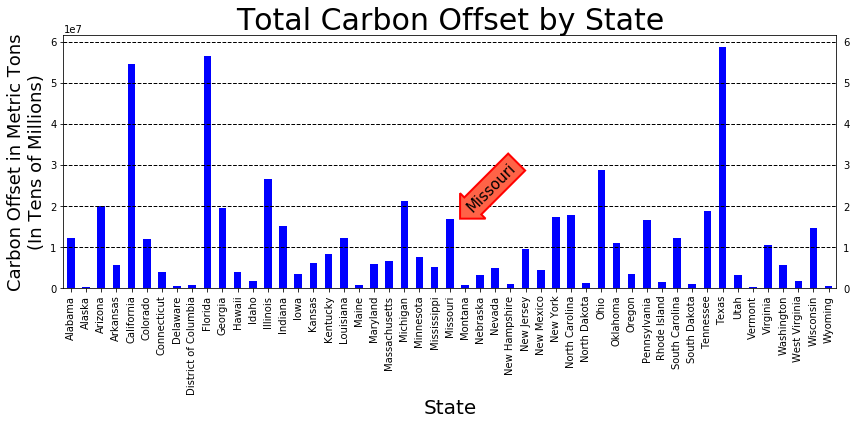

In [4]:
#Charts
#Bar Chart of Carbon Offset by State
sunroofStateFinal_DF.plot.bar(x = "State", y = "Carbon Offset", figsize = (12,6), legend = False, color = "blue")
plt.title("Total Carbon Offset by State", fontsize = 30)
plt.xlabel("State", fontsize = 20)
plt.ylabel("Carbon Offset in Metric Tons" 
           "\n"
           "(In Tens of Millions)", fontsize=18)

#plt.axvline(25,color = "red", lw = "0.5")
plt.axhline(10000000, ls = "--", color = "black", lw = "1")
plt.axhline(20000000, ls = "--", color = "black", lw = "1")
plt.axhline(30000000, ls = "--", color = "black", lw = "1")
plt.axhline(40000000, ls = "--", color = "black", lw = "1")
plt.axhline(50000000, ls = "--", color = "black", lw = "1")
plt.axhline(60000000, ls = "--", color = "black", lw = "1")
plt.tick_params(labelright=True)
bbox_props = dict(boxstyle = "larrow,pad=0.3", fc="tomato", ec="red", lw=2)
plt.text(27.75, 24500000, "Missouri", ha="center", va="center", 
             rotation = 45, size = 15, bbox=bbox_props)
plt.tight_layout()
#plt.savefig("Total Carbon Offset by State.png")
plt.show()


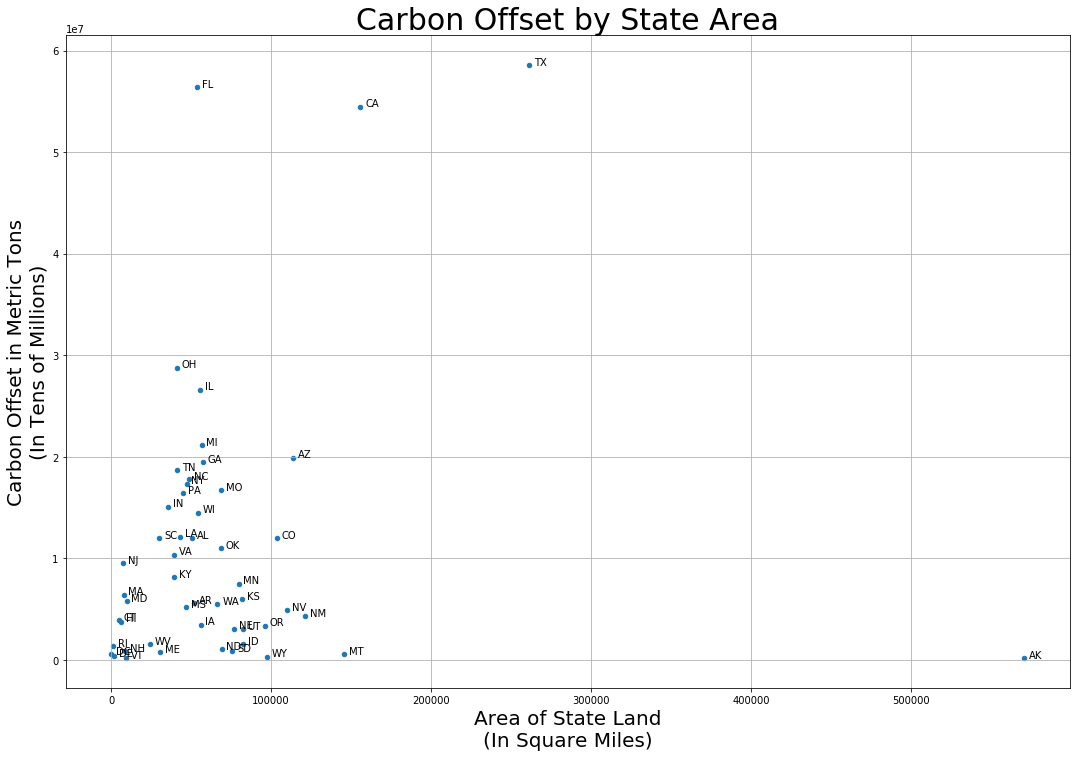

In [40]:
#Scatter plot
#Carbon Offset by Surface Area
sunroofStateFinal_DF.plot.scatter(x="Surface Area", y = "Carbon Offset", figsize = (18,12))
plt.title("Carbon Offset by State Area", fontsize=30)
plt.xlabel("Area of State Land" 
           "\n"
           "(In Square Miles)", fontsize = 20)
plt.ylabel("Carbon Offset in Metric Tons" 
           "\n"
           "(In Tens of Millions)", fontsize =20)
plt.grid(True)

#bbox_props = dict(boxstyle = "circle,pad=0.3", fc="tomato", ec="red", lw=2)
#plt.text(5000000, 140000, " ", ha="center", va="center", bbox=bbox_props)

#Annotation variables
test1 = np.array(sunroofStateFinal_DF["Surface Area"])
test2 = np.array(sunroofStateFinal_DF["Carbon Offset"])
variableLabel = np.array(sunroofStateFinal_DF.State_Abbreviation)

for i, txt in enumerate(variableLabel):
    plt.annotate(txt, (test1[i]+3000, test2[i]+1000))
    
plt.savefig("Carbon Offset by State Area.png")

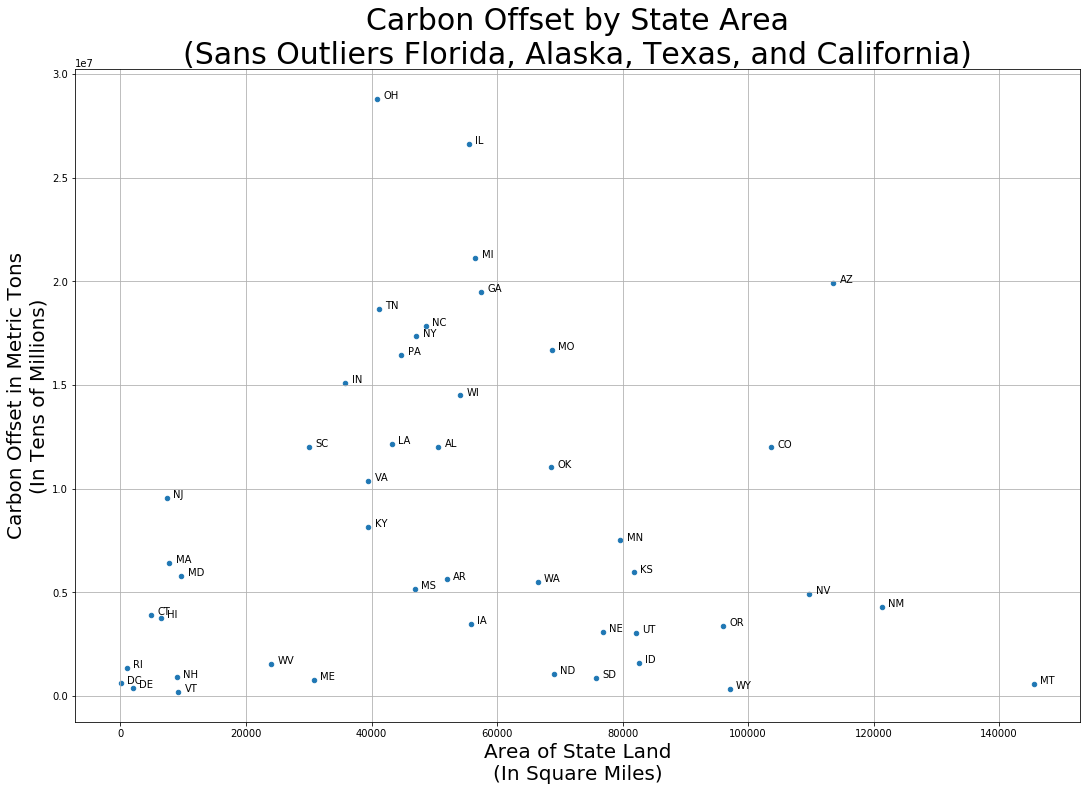

In [44]:
#Scatter plot
#Carbon Offset by state surface area removing outiers.
sunroofStateFinalRemoved_DF = sunroofStateFinal_DF.loc[sunroofStateFinal_DF["State"]!= "Texas"]
sunroofStateFinalRemoved_DF = sunroofStateFinalRemoved_DF.loc[sunroofStateFinalRemoved_DF["State"]!="California"]
sunroofStateFinalRemoved_DF = sunroofStateFinalRemoved_DF.loc[sunroofStateFinalRemoved_DF["State"]!="Florida"]
sunroofStateFinalRemoved_DF = sunroofStateFinalRemoved_DF.loc[sunroofStateFinalRemoved_DF["State"]!="Alaska"]

#Carbon Offset by Surface Area
sunroofStateFinalRemoved_DF.plot.scatter(x="Surface Area", y = "Carbon Offset", figsize = (18,12))
plt.title("Carbon Offset by State Area"
          "\n"
          "(Sans Outliers Florida, Alaska, Texas, and California)", fontsize = 30)
plt.xlabel("Area of State Land" 
           "\n"
           "(In Square Miles)",  fontsize = 20)
plt.ylabel("Carbon Offset in Metric Tons" 
           "\n"
           "(In Tens of Millions)", fontsize = 20)
plt.grid(True)

#Annotation variables
test1 = np.array(sunroofStateFinalRemoved_DF["Surface Area"])
test2 = np.array(sunroofStateFinalRemoved_DF["Carbon Offset"])
variableLabel = np.array(sunroofStateFinalRemoved_DF.State_Abbreviation)

for i, txt in enumerate(variableLabel):
    plt.annotate(txt, (test1[i]+1000, test2[i]+1000))
    
#plt.xlim(xmax = 150000)
#plt.xlim(xmin = -1000)
#plt.ylim(ymax = 30000000)
#plt.ylim(ymin = -500000)

plt.savefig("Carbon Offset by State Area Sans Outliers.png")

In [7]:
#DataFrame For Missouri
sunroofCityBase_DF = pd.read_csv(sunroofCity)
sunroofCityBaseTrim_DF = sunroofCityBase_DF.reindex(columns =["region_name", "state_name", "carbon_offset_metric_tons"])
sunroofCityMo = sunroofCityBaseTrim_DF.loc[sunroofCityBaseTrim_DF["state_name"]=="Missouri"]
#sunroofCityBase_DF.head()
#sunroofCityBaseTrim_DF.head()
sunroofCityMo.head()
#sunroofCityMo.count()


,region_name,state_name,carbon_offset_metric_tons
22,Affton,Missouri,68947.764116
32,Airport Drive,Missouri,9928.741651
108,Amazonia,Missouri,108.538894
198,Arnold,Missouri,162130.008802
281,Avondale,Missouri,871.825232


In [8]:
#Chart by postal code
sunroofCode_DF = pd.read_csv(sunroofCode)
#sunroofCode_DF.head()
sunroofCodeClean_DF = sunroofCode_DF.reindex(columns = ["region_name", "state_name", "carbon_offset_metric_tons", "count_qualified", "existing_installs_count"])
sunroofCodeMo_DF = sunroofCodeClean_DF.loc[sunroofCodeClean_DF["state_name"]=="Missouri"]
sunroofCodeMo2_DF = sunroofCodeMo_DF.loc[sunroofCodeMo_DF["region_name"] < 63159 ]
#sunroofCodeMo3_DF = sunroofCodeMo2_DF.loc[sunroofCodeMo_DF["region_name"] == 63155, 63117]
sunroofCodeMoRename = sunroofCodeMo2_DF.rename(columns = {"region_name": "Postal Code", "state_name": "State", "carbon_offset_metric_tons": "Carbon Offset", "count_qualified": "Qualified Count", "existing_installs_count": "Existing Installs"})
sunroofCodeMoRename

,Postal Code,State,Carbon Offset,Qualified Count,Existing Installs
6762,63005.0,Missouri,125012.521896,4947,35
6763,63010.0,Missouri,160133.702409,10066,41
6764,63011.0,Missouri,215073.094283,12373,45
6765,63017.0,Missouri,231886.897889,12947,46
6766,63021.0,Missouri,234023.476976,17341,58
6767,63026.0,Missouri,281499.538966,13433,53
6768,63031.0,Missouri,228646.408866,17410,20
6769,63033.0,Missouri,172521.709078,11030,25
6770,63034.0,Missouri,75576.862118,6227,17
6771,63038.0,Missouri,12593.696488,969,5
